# Logistic Regression

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


check how many people passed or not passed the test

In [10]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

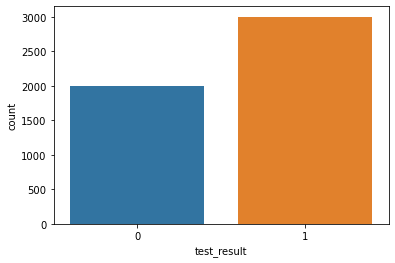

In [11]:
# visualize the data
sns.countplot(data=df, x='test_result');

------

check the distribution of features vs label 

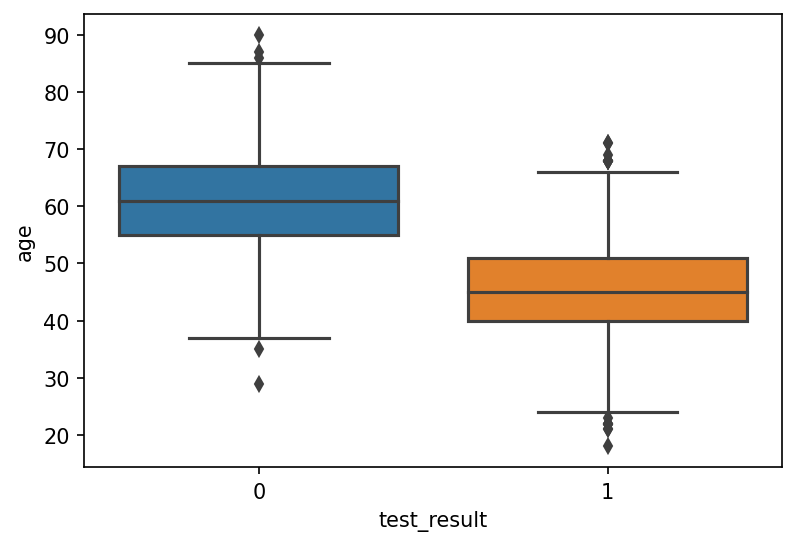

In [14]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='age');

As we can see from boxplot, age of people who didn't pass the test tends to be older which makes sense.However there are some outliers such under 30 years old and still didn't pass the test.

On the flip side, younger people tends to perform better and there are some outliers who are older than 60 yr and still pass the test.

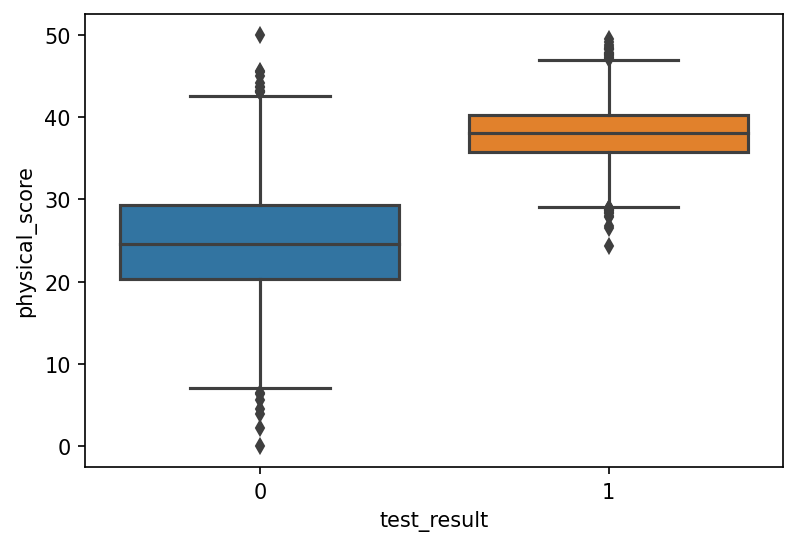

In [15]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='physical_score');

There is a sharp contrast between who pass the test and who didn't pass the test. The higher the physical score, you can expect to pass the test.

-------

We can check the relationship between physical score and age.

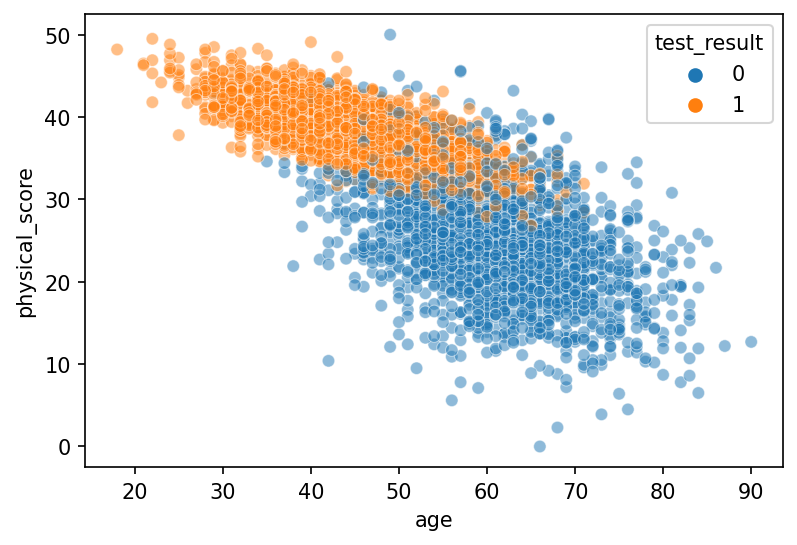

In [18]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5);

We can see from scatterplot, there are two group who passed the test and who didn't pass the test.

- for people who passed the test are younger people with higher physical_score.
- on the other hand, people who didn't pass the test tends to be older people with lower physical score.

-----

As dataset is quite small, we can use pairplot to check the relationship between features and labels.

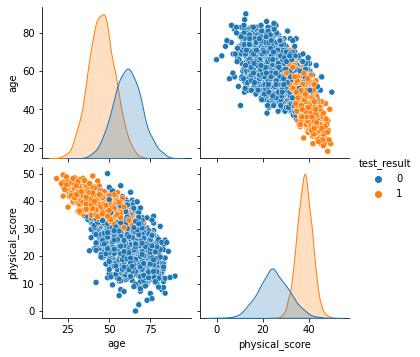

In [21]:
sns.pairplot(df, hue='test_result');

We can see the distribution of age, physical score. Plus age vs physical_score scatterplot.

--------

We can use heatmap to see how correlated features are.

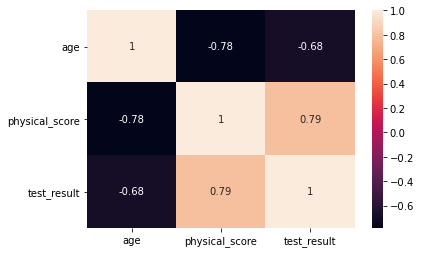

In [23]:
sns.heatmap(data=df.corr(), annot=True);

-----

#### When scatterplot doesn't informative enough for some features and labels

Esentially if we find this kind of scatter plot, we might want to use box plot instead.
Because based on the chart, we can see there are two classes and it is showing the distribution.

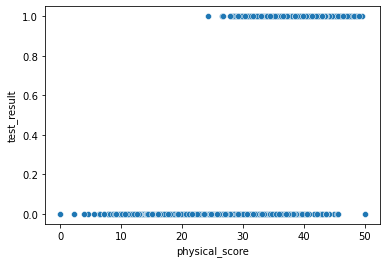

In [24]:
sns.scatterplot(data=df, x='physical_score', y='test_result');

<AxesSubplot:xlabel='age', ylabel='test_result'>

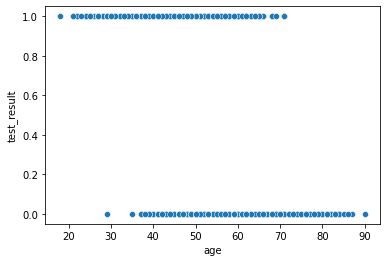

In [25]:
sns.scatterplot(x='age',y='test_result',data=df)

---------

### 3D scatterplot

https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

Text(0.5, 0, 'Test Result')

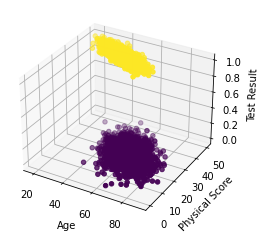

In [28]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result']);

ax.set_xlabel('Age')
ax.set_ylabel('Physical Score')
ax.set_zlabel('Test Result')

We can see that there are clearly two clusters who passed and who didn't pass the test.

--------